In [15]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Polynomial interpolation
## Lagrange polynomials
The Barycentric form is
$$ p(x) = \frac{\sum_{j=0}^n \frac{w_j y_j}{(x - x_j)} }{\sum_{j=0}^n \frac{w_j }{(x - x_j)}},
\quad w_j = \frac{1}{\displaystyle \prod_{\substack{i=0 \\\\ i\neq j}}^{n}(x_j - x_i)}$$

# Interpolation error
 Recall the following error bound we covered in class. Let $f \in C^{n+1}[a, b]$, and let $p$ be the interpolating polynomial for $f$ on distinct nodes $x_0,\ldots,x_n\in [a, b]$. Then, for every $x\in [a, b]$, we have
 $$\vert  f(x) - p(x) \vert \leq \frac{\Vert f^{(n+1)}\Vert_{\infty}}{(n+1)!}\prod_{i=0}^n\vert x - x_i \vert .$$

 $$\Vert f \Vert_{\infty} = \max_{x \in [a, b]} | f(x) |$$

## Example:
 Let $f(x) = \sin(x)$ and consider $n=2$ points at $x_0=0$, $x_1=\pi/4$, and $x_2 = \pi/2$. The polynomial is computed using the Barycentric formula below.

 Our function is infinitely differentiable, with $\Vert f'''\Vert_{\infty} = 1$.
 Hence,
$$\vert  \sin(x) - p(x) \vert \leq \frac{1}{6}\prod_{i=0}^n\vert x - x_i \vert .$$
 The final term in the error bound is
 $$\vert x(x-\pi/4)(x-\pi/2) \vert \leq \frac{\pi^3}{96\sqrt{3}}.$$
 This gives us the bound
 $$ \Vert \sin(x) - p(x) \Vert_{\infty} \leq  \frac{\pi^3}{576\sqrt{3}} $$

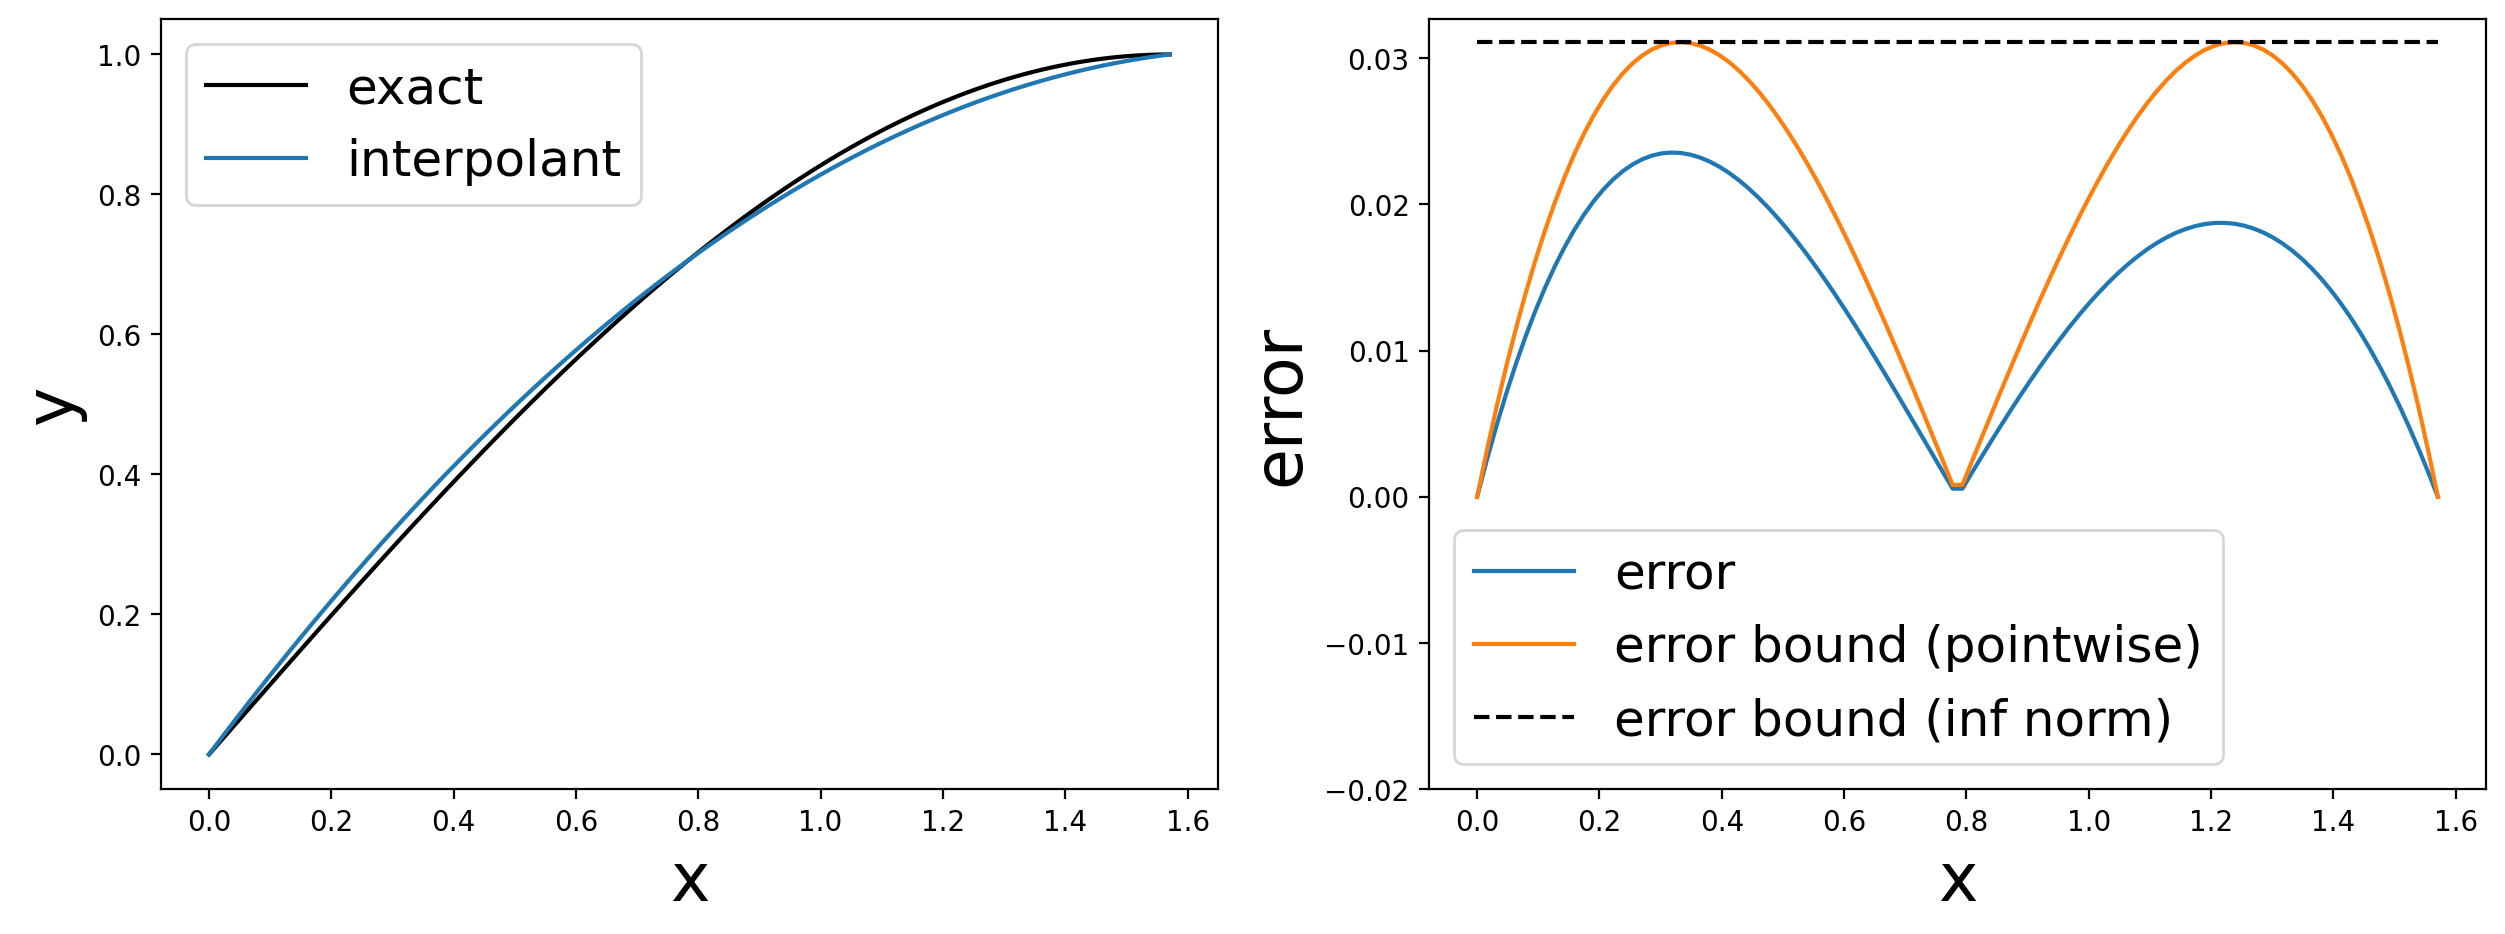

In [2]:
def f(x):
    return sin(x)
xnodes = array([0., pi/4., pi/2.])
ynodes = f(xnodes)
weights = array(
    [1/(xnodes[0] - xnodes[1])/(xnodes[0] - xnodes[2]),
    1/(xnodes[1] - xnodes[0])/(xnodes[1] - xnodes[2]),
    1/(xnodes[2] - xnodes[0])/(xnodes[2] - xnodes[1])])

x = linspace(0., pi/2., 100)
yexact = f(x)
bary_numer = zeros(x.size)
bary_denom = zeros(x.size)
replace_point_indices = []
y_replace = []
for j in arange(xnodes.size):
    b = zeros(x.size) ## create an empty array to put values into
    x_not_at_nodes = x[x != xnodes[j]] ## logical indexing: access only values in the
                                       ## array x that are not equal to xnodes[j], result
                                       ## is another array with (possibly) fewer elements
    b[x != xnodes[j]] = weights[j]/(x_not_at_nodes - xnodes[j])
    bary_numer += ynodes[j]*b
    bary_denom += b
    ## below is for the case where a value in the array x is equal to xnodes[j]
    index = where(x == xnodes[j])[0]
    replace_point_indices.extend(index)
    if index.size > 0:
        y_replace.append(ynodes[j])
yinterp = bary_numer/bary_denom
yinterp[replace_point_indices] = y_replace ## replace values where x == xnodes

fig = figure(1, [15, 5])
fig.add_subplot(121)
plot(x, yexact, 'k', label='exact')
plot(x, yinterp, label='interpolant')
xlabel('x', fontsize=24)
ylabel('y', fontsize=24)
legend(fontsize=18)

fig.add_subplot(122)
plot(x, absolute(yexact - yinterp), label='error')
plot(x, 1/6.*absolute(x*(x-pi/2)*(x-pi/4)),  label='error bound (pointwise)')
plot(x, pi**3/(576*sqrt(3))*ones_like(x), '--k', label='error bound (inf norm)')
xlabel('x', fontsize=24)
ylabel('error', fontsize=24);
ylim(-0.02)
legend(fontsize=18);


# Stability of interpolation in the $n\to\infty$ limit

### Lebesgue constant
$$ \Lambda_n =  \max_{a \leq x \leq b} \sum_{j=0}^n \vert L_j(x) \vert  .$$

### Theorem: Stability

Let $x_0, x_1, \ldots x_n$  be distinct nodes, and suppose $p(x)$ and $\hat{p}(x)$ are polynomials of degree at most $n$ satisfying $p(x_j) = y_j$ and $\hat{p}(x_j) = \hat{y}_j$, $j=0,1,\ldots, n$. If
$$  \vert y_j - \hat{y}_j\vert \leq \delta,  \quad j=0,1,\ldots, n,$$
then
$$ \Vert p - \hat{p} \Vert_{\infty} \leq \Lambda_n \delta.$$

# Example: Gaussian function using uniform nodes
$$f(x) = e^{-\frac{x^2}{2}} $$
The Lebesgue constant $\Lambda_n$ for uniform nodes is bounded from below by
$$\Lambda_n \geq \frac{2^n}{4n^2} .$$
Notice this is exponentially growing!

In [18]:
from scipy.special import binom ## this imports a function to compute binomial coeficients

def bary_weights_uniform(n): ## homework problem 2 asks you to derive this formula
    j = arange(n+1)
    return (-1)**j*binom(n, j)

def f(x):
    return exp(-x**2/2)


@interact(n=(2, 100, 1))
def plot_fn(n=2):
    xnodes = linspace(-3., 3., n+1)
    ynodes = f(xnodes)
    w = bary_weights_uniform(n)

    x = linspace(-3., 3., 200) + 1e-5 # I am adding a small number so that values are
                                      # not the same as the nodes

    bary = w[:, None]/(x[None, :] - xnodes[:, None]) ## you should use loops in your
                                                  ## homework assignment
    yinterp = (bary*ynodes[:, None]).sum(axis=0)/bary.sum(axis=0)

    figure(1, [7, 5])
    plot(x, f(x), 'k', label='exact')
    plot(xnodes, ynodes, 'kx')
    plot(x, yinterp, label='interp')
    legend()
    show()

interactive(children=(IntSlider(value=2, description='n', min=2), Output()), _dom_classes=('widget-interact',)…

In [4]:
bary_weights_uniform(3)

array([ 1., -3.,  3., -1.])

## Now with Chebyshev nodes
Chebyshev nodes are given by $x_j = -\cos(j\pi/n)$.  The Lebesgue constant $\Lambda_n$ for Chebyshev nodes is
$$\Lambda_n = O(\log(n)).$$

In [19]:
from scipy.special import binom ## this imports a function to compute binomial coeficients

def bary_weights_cheb(n):
    j = arange(n+1)
    d = ones(n+1)
    d[0] = 0.5
    d[-1] = 0.5
    return (-1)**j*d

def f(x):
    return exp(-x**2/2.)


@interact(n=(2, 100, 1))
def plot_fn(n=2):
    xnodes = -3*cos(arange(n+1)*pi/n)
    ynodes = f(xnodes)
    w = bary_weights_cheb(n)

    x = linspace(-3., 3., 200) + 1e-5 # I am adding a small number so that values are
                                      # not the same as the nodes

    bary = w[:, None]/(x[None, :] - xnodes[:, None]) ## you should use loops in your
                                                  ## homework assignment
    yinterp = (bary*ynodes[:, None]).sum(axis=0)/bary.sum(axis=0)

    figure(1, [7, 5])
    plot(x, f(x), 'k', label='exact')
    plot(xnodes, ynodes, 'kx')
    plot(x, yinterp, label='interp')
    legend()
    show()

interactive(children=(IntSlider(value=2, description='n', min=2), Output()), _dom_classes=('widget-interact',)…

# Example: The Runge function is particularly sensitive to the Runge phenomenon

$$f(x) = \frac{1}{1 + 25x^2}$$
The $n$th derivative grows near the end points of the interval $[-1, 1]$ and is exponentially growing as $n\to\infty$. The exponential growth of the derivative and the Lebesgue constant (for uniform nodes) combine to make large errors at the end points.

In [16]:
from scipy.special import binom

def bary_weights_uniform(n):
    j = arange(n+1)
    return (-1)**j*binom(n, j)

def f_runge(x):
    return 1/(1 + 25.*x**2)


@interact(n=(2, 100, 1))
def plot_fn(n=2):
    xnodes = linspace(-1., 1., n+1)
    ynodes = f_runge(xnodes)
    w = bary_weights_uniform(n)

    x = linspace(-1., 1., 200) + 1e-5 # I am adding a small number so that values are
                                      # not the same as the nodes

    bary = w[:, None]/(x[None, :] - xnodes[:, None]) ## you should use loops in your
                                                  ## homework assignment
    yinterp = (bary*ynodes[:, None]).sum(axis=0)/bary.sum(axis=0)

    figure(1, [7, 5])
    plot(x, f_runge(x), 'k', label='exact')
    plot(xnodes, ynodes, 'kx')
    plot(x, yinterp, label='interp')
    legend(loc='upper right', fontsize=18)
    show()

interactive(children=(IntSlider(value=2, description='n', min=2), Output()), _dom_classes=('widget-interact',)…

## Let's try the same function with Chebyshev nodes instead
Chebyshev nodes $x_j = -\cos(j\pi/n)$

In [17]:
from scipy.special import binom

def bary_weights_cheb(n):
    j = arange(n+1)
    d = ones(n+1)
    d[0] = 0.5
    d[-1] = 0.5
    return (-1)**j*d

def f_runge(x):
    return 1/(1 + 25.*x**2)


@interact(n=(2, 100, 1))
def plot_fn(n=2):
    xnodes = -cos(arange(n+1)*pi/n)
    ynodes = f_runge(xnodes)
    w = bary_weights_cheb(n)

    x = linspace(-1., 1., 200) + 1e-5 # I am adding a small number so that values are
                                      # not the same as the nodes

    bary = w[:, None]/(x[None, :] - xnodes[:, None]) ## you should use loops in your
                                                    ## homework assignment
    yinterp = (bary*ynodes[:, None]).sum(axis=0)/bary.sum(axis=0)

    figure(1, [7, 5])
    plot(x, f_runge(x), 'k', label='exact')
    plot(xnodes, ynodes, 'kx')
    plot(x, yinterp, label='interp')
    legend(loc='upper right')
    show()

interactive(children=(IntSlider(value=2, description='n', min=2), Output()), _dom_classes=('widget-interact',)…